# Gradient Descent Demonstration (from scratch)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Data Generation and Setup
# -------------------------------

In [2]:
def generate_data( n_samples = 100, noise = 0.1, seed =42):
    """
    Generate random samples (synthetic) linear data: y=4 + 3*X + noise
    """
    np.random.seed(seed) #to ensure the reproducibility of the same random data -->to fix the random numbers generated
    X = 2 * np.random.randn(n_samples, 1) #generates random numbers from `standard normal distribution`
    y = 4 + 3*X + noise*np.random.randn(n_samples, 1) # Creates a random distribution around a line having some random noise added to it as well

    return X, y
    

`np.random.randn`:

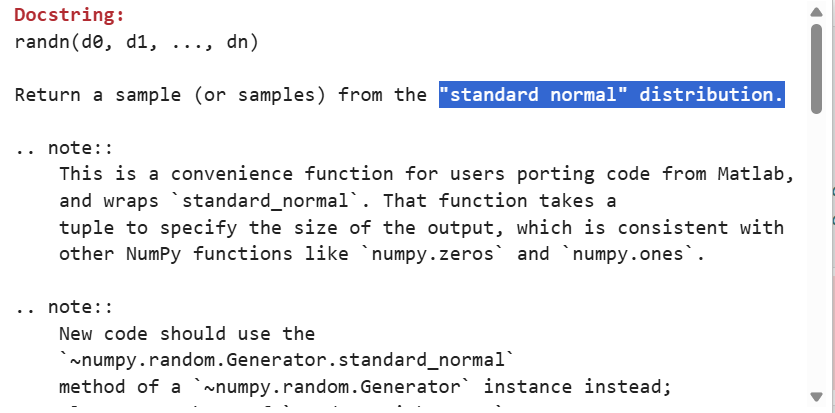

### Showing random samples from Standard Normal Distribution

In [3]:
random_data = np.random.randn(1000)

In [4]:
random_data[:10]

array([-1.80798225,  1.22396916,  0.78033419,  1.74876205,  2.40173865,
        2.17094929,  0.1295337 ,  0.9370679 , -0.61127041, -1.19559276])

In [5]:
random_data.mean(), random_data.std()

(0.04500415883122854, 0.994831365912575)

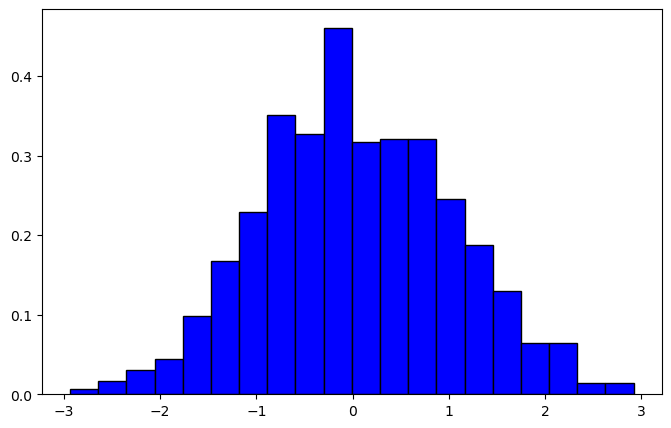

In [6]:
plt.figure(figsize=(8,5))
plt.hist(random_data, bins=20, density = True, color='blue', edgecolor='black')
plt.show()

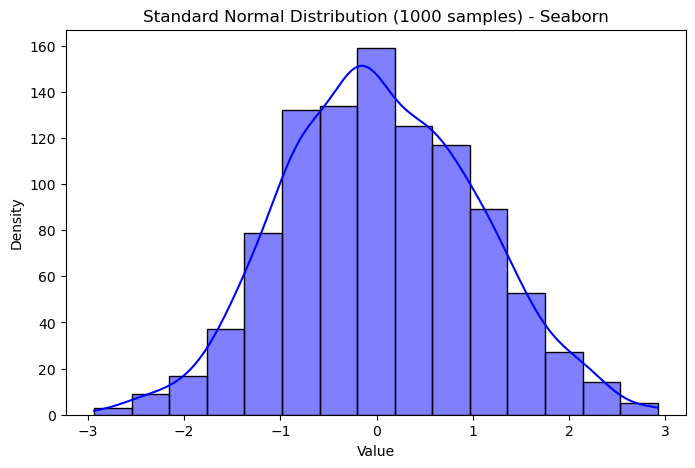

In [7]:
# Plot using seaborn with KDE curve
plt.figure(figsize=(8,5))
sns.histplot(random_data, bins=15, kde=True, color='blue', edgecolor='black')

# Add labels and title
plt.title("Standard Normal Distribution (1000 samples) - Seaborn")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(False)
plt.show()

In [8]:
### Let us generate some data
X, y = generate_data(n_samples=100, noise=2)

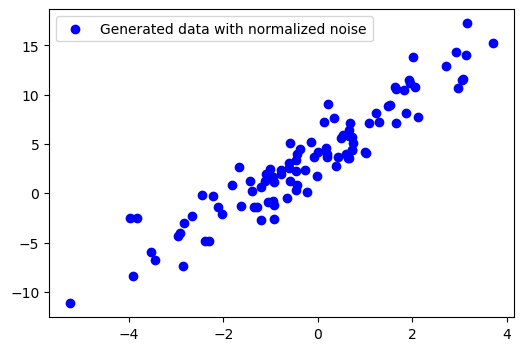

In [9]:
### Let us plot the data distribution
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue' , label = 'Generated data with normalized noise')
plt.legend()
plt.show()

### Data distribution `without noise`

In [10]:
### Let us generate some data
X1, y1 = generate_data(n_samples=100, noise=0)

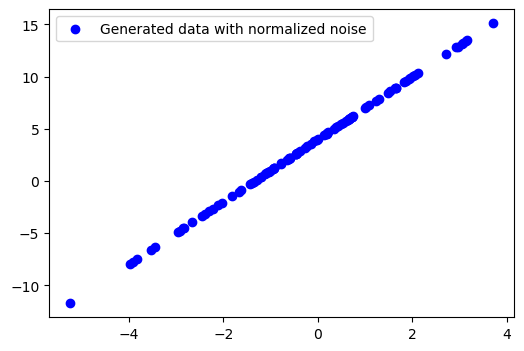

In [11]:
### Let us plot the data distribution
plt.figure(figsize=(6,4))
plt.scatter(X1, y1, color='blue' , label = 'Generated data with normalized noise')
plt.legend()
plt.show()

### Let us define the `cost function` for simple linear regression 

- For linear regression problem, we use `mean-squared error` (MSE)

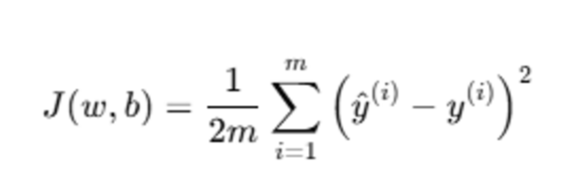

In [12]:
def compute_cost(X, y, theta):
    """
    Compute the mean squared error cost function
    """
    m = len(y) #no. of rows in the training data
    return np.sum((X.dot(theta) - y)**2)/(2*m) #Cost Function - MSE

In [13]:
### Let us generate some data
generate_data(n_samples=10, noise=2)

(array([[ 0.99342831],
        [-0.2765286 ],
        [ 1.29537708],
        [ 3.04605971],
        [-0.46830675],
        [-0.46827391],
        [ 3.15842563],
        [ 1.53486946],
        [-0.93894877],
        [ 1.08512009]]),
 array([[ 6.05344953],
        [ 2.23895469],
        [ 8.37005577],
        [ 9.31161865],
        [-0.85475591],
        [ 1.4706032 ],
        [11.44961465],
        [ 9.23310304],
        [-0.63289447],
        [ 4.43075286]]))

### Adding a `unit` bias term to X

In [14]:
### Number of rows in the training data
m = len(y)
print("Number of rows:", m)

Number of rows: 100


In [15]:
### let us add unit bias term
X_b = np.c_[np.ones((m,1)), X] #adding a column having all the values 1

In [16]:
X_b[:10]

array([[ 1.        ,  0.99342831],
       [ 1.        , -0.2765286 ],
       [ 1.        ,  1.29537708],
       [ 1.        ,  3.04605971],
       [ 1.        , -0.46830675],
       [ 1.        , -0.46827391],
       [ 1.        ,  3.15842563],
       [ 1.        ,  1.53486946],
       [ 1.        , -0.93894877],
       [ 1.        ,  1.08512009]])

### Let us define the `BATCH GRADIENT DESCENT` function



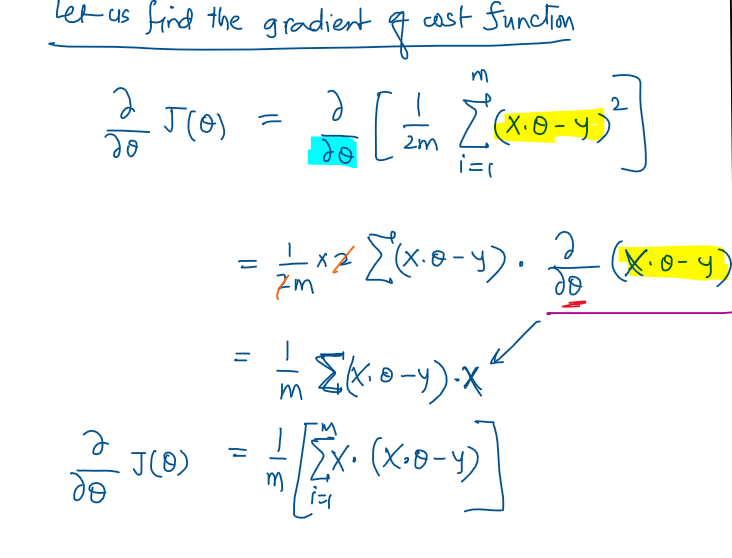

In [17]:
def bgd(X, y, theta, learning_rate=0.01, epochs=100):
    """
    Batch Gradient Descent (Vanilla) using the entire training dataset
    X = Array of X with the added bias (X_b)
    y = Vector of y
    theta: Array of weight & bias parameters randomly assigned
    learning_rate: alpha value set to default 0.01
    epochs: number of times model will run through the entire training dataset
    """
    m = len(y)  # number of training rows

    # Arrays to track cost and theta history
    cost_history = np.zeros(epochs)                     # 1D array to store cost after each epoch
    theta_history = np.zeros((epochs, theta.shape[0]))  # 2D array to store parameter values

    for epoch in range(epochs):
        # Compute gradient
        gradients = (X.T.dot(X.dot(theta) - y)) / m

        # Update parameters
        theta = theta - (learning_rate * gradients)

        # Compute cost
        cost = compute_cost(X, y, theta)

        # Store history
        cost_history[epoch] = cost
        theta_history[epoch, :] = theta.T

    return theta, cost_history, theta_history


### Run the `BGD` algorithm

In [18]:
### Initialize the theta values randomly
np.random.seed(30)
theta = np.random.randn(2,1)
print(theta)

[[-1.26405266]
 [ 1.52790535]]


In [19]:
theta_bgd, cost_history_bgd, theta_history_bgd = bgd(X_b, y, theta, learning_rate=0.1,epochs=100)

In [20]:
print('Final BGD Theta 0 (Bias): {:0.3f}, \nFinal BGD Theta 1 (Weight): {:0.3f}'.format(theta_bgd[0][0], theta_bgd[1][0]))
print('BGD Final Cost Value: {:0.3f}'.format(cost_history_bgd[-1]))

Final BGD Theta 0 (Bias): 4.015, 
Final BGD Theta 1 (Weight): 2.857
BGD Final Cost Value: 1.767


In [21]:
cost_history_bgd

array([13.84405091, 11.39069705,  9.50574584,  8.02181568,  6.83676914,
        5.88267047,  5.11100354,  4.48530827,  3.97726577,  3.56443778,
        3.22883908,  2.95595942,  2.7340495 ,  2.55357654,  2.40679752,
        2.28741939,  2.19032581,  2.11135641,  2.04712777,  1.99488822,
        1.95239981,  1.91784235,  1.88973543,  1.86687497,  1.84828168,
        1.83315902,  1.82085917,  1.81085523,  1.80271863,  1.79610082,
        1.79071829,  1.78634047,  1.78277982,  1.7798838 ,  1.77752836,
        1.77561258,  1.77405441,  1.77278708,  1.77175632,  1.77091796,
        1.77023609,  1.7696815 ,  1.76923042,  1.76886355,  1.76856516,
        1.76832246,  1.76812507,  1.76796452,  1.76783394,  1.76772773,
        1.76764135,  1.7675711 ,  1.76751395,  1.76746748,  1.76742968,
        1.76739893,  1.76737392,  1.76735359,  1.76733704,  1.76732359,
        1.76731265,  1.76730375,  1.76729651,  1.76729062,  1.76728583,
        1.76728194,  1.76727877,  1.76727619,  1.7672741 ,  1.76

In [22]:
theta_history_bgd

array([[-0.76376086,  1.85800835],
       [-0.30664223,  2.08926354],
       [ 0.10956755,  2.25348522],
       [ 0.48756712,  2.37200664],
       [ 0.83022834,  2.45915744],
       [ 1.1404335 ,  2.52458491],
       [ 1.42097703,  2.5748037 ],
       [ 1.67450921,  2.61423066],
       [ 1.90350705,  2.64587603],
       [ 2.11026235,  2.67180537],
       [ 2.29688066,  2.69344827],
       [ 2.46528665,  2.71180497],
       [ 2.61723329,  2.72758471],
       [ 2.754313  ,  2.7412984 ],
       [ 2.87796957,  2.75332097],
       [ 2.98951018,  2.76393326],
       [ 3.09011713,  2.77335033],
       [ 3.18085898,  2.78174061],
       [ 3.26270091,  2.78923901],
       [ 3.33651437,  2.79595582],
       [ 3.403086  ,  2.80198294],
       [ 3.46312564,  2.80739819],
       [ 3.51727379,  2.8122684 ],
       [ 3.56610827,  2.81665156],
       [ 3.61015034,  2.8205985 ],
       [ 3.64987018,  2.82415403],
       [ 3.68569188,  2.82735791],
       [ 3.71799796,  2.83024554],
       [ 3.7471334 ,

### Plotting the `cost function` vs `epoch`

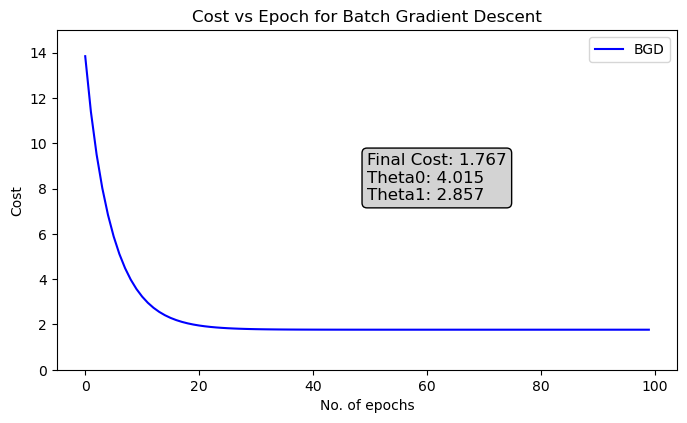

In [23]:
plt.figure(figsize = (8,15)) #canvas ready

### plot for BGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_bgd)), cost_history_bgd, label='BGD', color='blue')
plt.title('Cost vs Epoch for Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,15)
plt.legend()

plt.annotate(f'Final Cost: {cost_history_bgd[-1]:.3f}\nTheta0: {theta_bgd[0][0]:.3f}\nTheta1: {theta_bgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.show()

### Let us plot the `best fit line` coming out of `BGD`

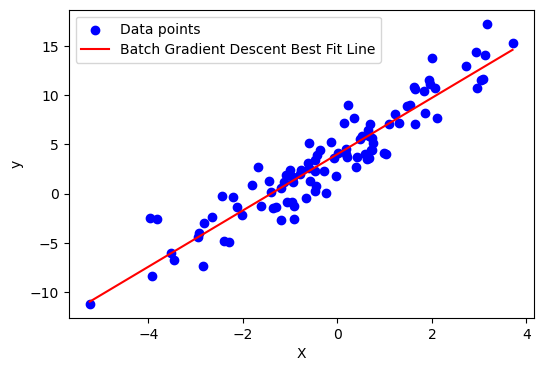

In [24]:
### Create a range of values for plotting the best fit line
x_plot = np.linspace(X.min(), X.max(), 100).reshape(100,1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

### plot the best-fit line for BGD on top of the data distribution
plt.figure(figsize = (6,4))
plt.scatter(X, y, color='blue',label='Data points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='red', label='Batch Gradient Descent Best Fit Line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Running `BGD` on a simple data to understand the code

In [48]:
# Sample data
X = np.array([[1], [2], [3], [4], [5]])   # feature matrix (5x1)
y = np.array([[5], [7], [9], [11], [13]]) # target values (5x1)

# Add bias term (column of 1s)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape (5x2)
X_b



array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [32]:
theta = np.zeros((2,1))
print(theta)

[[0.]
 [0.]]


In [39]:
theta_bgd_2, cost_history_bgd_2, theta_history_bgd_2 = bgd(X_b, y, theta, learning_rate=0.1,epochs=10)

In [40]:
print('Final BGD Theta 0 (Bias): {:0.3f}, \nFinal BGD Theta 1 (Weight): {:0.3f}'.format(theta_bgd_2[0][0], theta_bgd_2[1][0]))
print('BGD Final Cost Value: {:0.3f}'.format(cost_history_bgd_2[-1]))

Final BGD Theta 0 (Bias): 1.084, 
Final BGD Theta 1 (Weight): 2.531
BGD Final Cost Value: 0.334


In [41]:
theta_history_bgd_2

array([[0.9       , 3.1       ],
       [0.78      , 2.52      ],
       [0.846     , 2.614     ],
       [0.8772    , 2.5848    ],
       [0.91404   , 2.57836   ],
       [0.949128  , 2.567952  ],
       [0.9838296 , 2.5584664 ],
       [1.01790672, 2.54900448],
       [1.0514147 , 2.53972754],
       [1.08435497, 2.53060284]])

### Plotting the `cost function` vs `epoch`

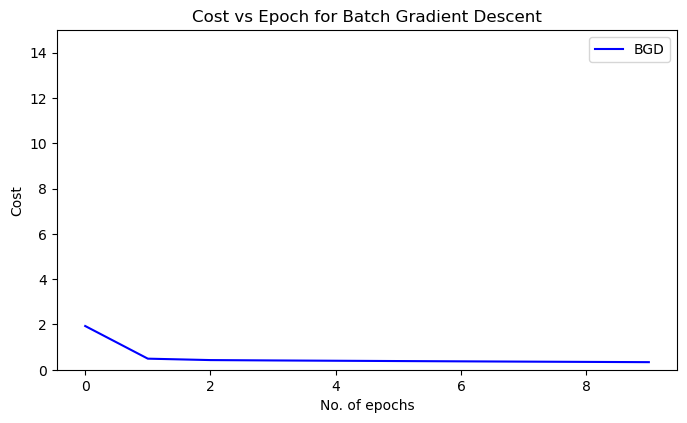

In [42]:
plt.figure(figsize = (8,15)) #canvas ready

### plot for BGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_bgd_2)), cost_history_bgd_2, label='BGD', color='blue')
plt.title('Cost vs Epoch for Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,15)
plt.legend()

plt.show()

### Let us plot the `best fit line` coming out of `BGD`

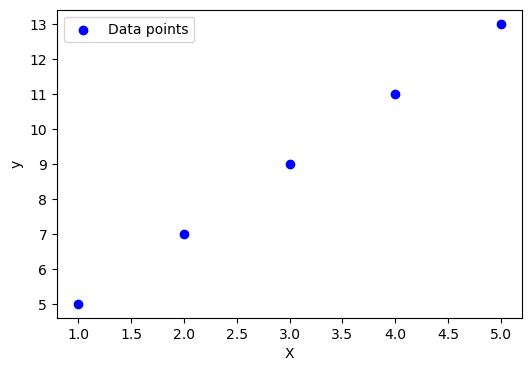

In [46]:
### Create a range of values for plotting the best fit line
x_plot = np.linspace(X.min(), X.max(), 100).reshape(100,1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

### plot the best-fit line for BGD on top of the data distribution
plt.figure(figsize = (6,4))
plt.scatter(X, y, color='blue',label='Data points')
# plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='red', label='Batch Gradient Descent Best Fit Line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Mini Batch Gradient Descent Algorithm

### Let us define the `mini-batch gradient descent` function

In [44]:
def mbgd(X,y, theta, learning_rate = 0.1, epochs = 100, batch_size =32):
    '''
    Mini Batch Gradient Descent using batches of standard size 32
    X = Array of X with the added bias (X_b)
    y = Vector of y
    theta: Array of weight & bias parameters randomly assigned
    learning_rate: alpha value set to default 0.01
    epochs: number of times model will run through the entire training dataset
    batch_size = default batch size is 32 which means that in a mini batch there are 32 samples of the training data by default
    
    '''
    m = len(y)  # number of training rows
    n_batches = int(np.ceil(m/batch_size)) # integral number of batches from the training dataset
    total_updates = epochs * n_batches # total number of updates
    
    # Arrays to track cost and theta history
    cost_history = np.zeros(total_updates)                     # 1D array to store cost after each epoch
    theta_history = np.zeros((total_updates, theta.shape[0]))  # 2D array to store parameter values

    iter_num = 0 ### to index cost history and theta history

    for epoch in range(epochs):

        ### Shuffle the training dataset at the beginning of each update
        indices = np.random.permutation(m) #shuffle the indices
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i : i + batch_size]
            y_batch = y_shuffled[i : i + batch_size]

            ### Calculate the gradients
            gradients = (X_batch.T.dot(X_batch.dot(theta) - y_batch))/len(y_batch) ### avg. gradient of a mini-batch one by one
            theta = theta - learning_rate * gradients

            ### Record the cost values after each mini-update
            cost = compute_cost(X,y,theta)

            ### Update the empty cost and theta arrays after each mini-update
            cost_history[iter_num] = cost #uni-dimension cost
            theta_history[iter_num, :] = theta.T #2-D
            iter_num += 1


    return theta, cost_history, theta_history

### Running the `MBGD` function

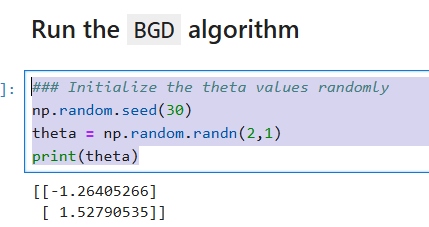

In [62]:
### Initialize the theta values randomly
np.random.seed(30)
theta = np.random.randn(2,1)
print(theta)

[[-1.26405266]
 [ 1.52790535]]


In [64]:
theta_mbgd, cost_history_mbgd, theta_history_mbgd = mbgd(X_b, y, theta, learning_rate=0.1, epochs =100, batch_size=32)

In [65]:
print('Final MBGD Theta 0 (Bias): {:0.3f}, \nFinal MBGD Theta 1 (Weight): {:0.3f}'.format(theta_mbgd[0][0], theta_mbgd[1][0]))
print('MBGD Final Cost Value: {:0.3f}'.format(cost_history_mbgd[-1]))

Final MBGD Theta 0 (Bias): 3.956, 
Final MBGD Theta 1 (Weight): 2.785
MBGD Final Cost Value: 1.777


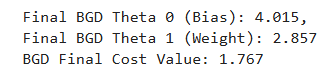

In [66]:
cost_history_mbgd.shape

(400,)

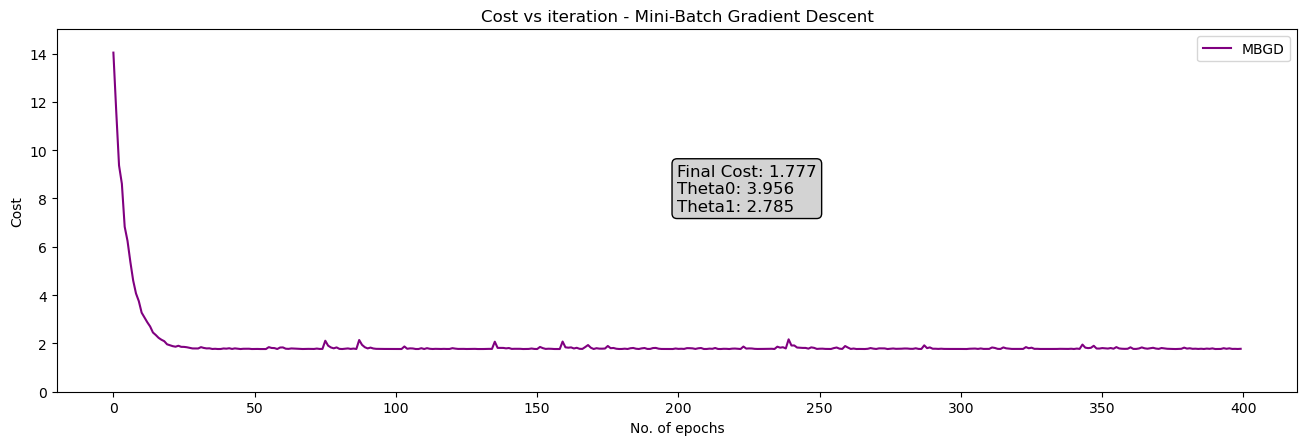

In [67]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(16,16)) #canvas ready

# Plot for MBGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_mbgd)), cost_history_mbgd, label='MBGD', color='purple')
plt.title('Cost vs iteration - Mini-Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,15)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_mbgd[-1]:.3f}\nTheta0: {theta_mbgd[0][0]:.3f}\nTheta1: {theta_mbgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)
plt.show()

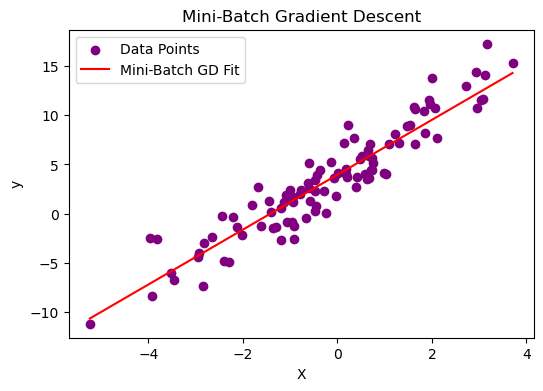

In [68]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='purple', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_mbgd), color='red', label='Mini-Batch GD Fit')
plt.title("Mini-Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Create a combined `best fit line` comparing `BGD` and `MBGD`

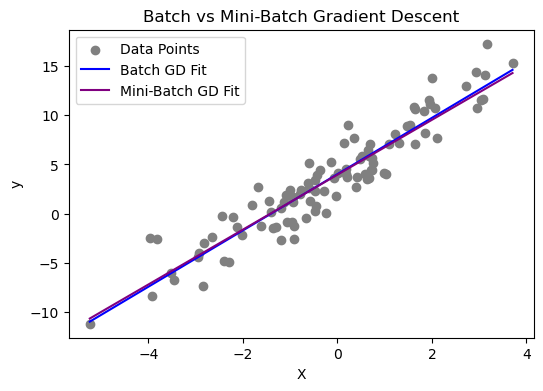

In [69]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='grey', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='blue', label='Batch GD Fit') #BGD plot
plt.plot(x_plot, x_plot_b.dot(theta_mbgd), color='purple', label='Mini-Batch GD Fit')# MBGD plot
plt.title("Batch vs Mini-Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

- Conclusion: `MBGD` and `BGD`are almost giving similar best fit lines - looking at cost function values

### STOCHASTIC GRADIENT DESCENT DEMONSTRATION

In [78]:
def sgd(X, y, theta, learning_rate = 0.1, epochs = 100):
    
    """
    X = Array of X with the added bias (X_b)
    y = Vector of y
    theta: Array of weight & bias paramter randomly assigned
    learning_rate: alpha value set to default 0.1
    epochs: number of times model will run through the entire training dataset
    """
    m = len(y) # number of training rows
    
    total_updates = m * epochs # total number of updates = number of training rows * number of epochs
    
    cost_history = np.zeros(total_updates) #zero-array to store the cost after each update
    theta_history = np.zeros((total_updates, theta.shape[0])) #zero-array to store the parameters (weight & bias) values

    for epoch in range(epochs):

        for i in range(m):

            ### Randomly select a training row/example/record
            rand_index = np.random.randint(0,m)
            X_i = X[rand_index, :].reshape(1, X.shape[1])
            y_i = y[rand_index, :].reshape(1,1)

            ### Compute the gradient for each training row and update the theta values
            gradients = (X_i.T.dot(X_i.dot(theta) - y_i))
            theta = theta - learning_rate * gradients
            cost = compute_cost(X, y, theta)


            ### Update these empty arrays for theta and cost_history
            cost_history[epoch * m + i] = cost # uni-dimension
            theta_history[epoch * m + i, :] = theta.T # 2-dimensions
            
    return theta, cost_history, theta_history

#### Note: Currently in above code, we are implementing `SGD` with replacement. However alternative approach can be: `Sample without replacement`

In [120]:
### Initialize the theta values randomly
np.random.seed(30)
theta = np.random.randn(2,1)
print(theta)

[[-1.26405266]
 [ 1.52790535]]


In [121]:
theta_sgd, cost_history_sgd, theta_history_sgd = sgd(X_b, y, theta, learning_rate=0.1, epochs=100)

In [122]:
cost_history_sgd

array([13.4338639 , 13.38175993, 11.11106066, ..., 10.5986673 ,
       11.34755696,  6.39465911])

In [123]:
print('Final SGD Theta 0 (Bias): {:0.3f}, \nFinal SGD Theta 1 (Weight): {:0.3f}'.format(theta_sgd[0][0], theta_sgd[1][0]))
print('SGD Final Cost Value: {:0.3f}'.format(cost_history_sgd[-1]))

Final SGD Theta 0 (Bias): 4.030, 
Final SGD Theta 1 (Weight): 1.185
SGD Final Cost Value: 6.395


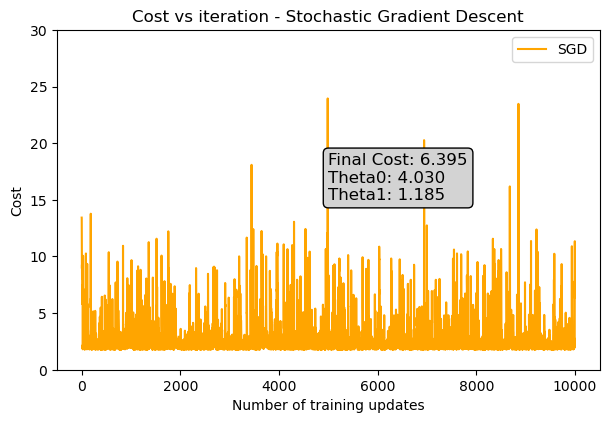

In [124]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(7,15)) #canvas ready

# Plot for SGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD', color='orange')
plt.title('Cost vs iteration - Stochastic Gradient Descent')
plt.xlabel('Number of training updates')
plt.ylabel('Cost')
plt.ylim(0,30)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_sgd[-1]:.3f}\nTheta0: {theta_sgd[0][0]:.3f}\nTheta1: {theta_sgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)
plt.show()

### Best fit line using `SGD`

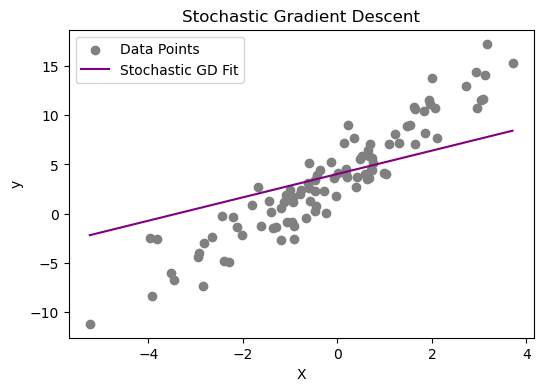

In [125]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='grey', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_sgd), color='purple', label='Stochastic GD Fit')
plt.title("Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Comparing `best fit lines` for `BGD`, `MBGD` and `SGD`

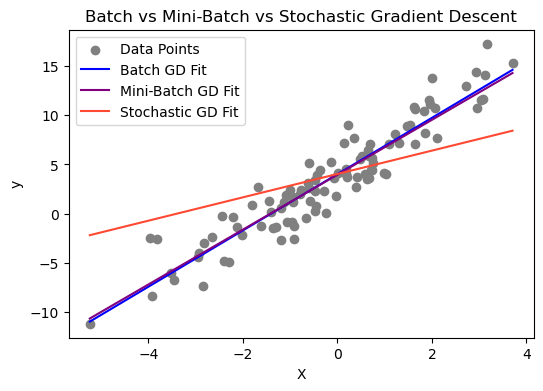

In [85]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='grey', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='blue', label='Batch GD Fit') #BGD plot
plt.plot(x_plot, x_plot_b.dot(theta_mbgd), color='purple', label='Mini-Batch GD Fit')# MBGD plot
plt.plot(x_plot, x_plot_b.dot(theta_sgd), color='#ff4933', label='Stochastic GD Fit')# SGD plot
plt.title("Batch vs Mini-Batch vs Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()